In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

%load_ext autoreload
%autoreload 2
from utils import show_heat_map, print_mutual_info, aggregate_data, resample_df

df_raw = pd.read_csv("../simulation_data/output_20250308.csv")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
SUM_TRADE_SIZE = df_raw['trade_size'].sum()
df_buy, df_sell, df_ob = aggregate_data(df_raw)
df = resample_df(df_buy, df_sell, df_ob, '5ms')

Rows: 763


,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,135,140,145,150,155,160,165,170,175,180,185,190,195,200,205,210,215,220,225,230,235,240,245,250,255,260,265,270,275,280,285,290,295,300,305,310,315,320,325,330,335,340,345,350,355,360,365,370,375,380,385,390,395,400,405,410,415,420,425,430,435,440,445,450,455,460,465,470,475,480,485,490,495
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000031,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030,1.000030
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000145,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000143,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142,0.000142


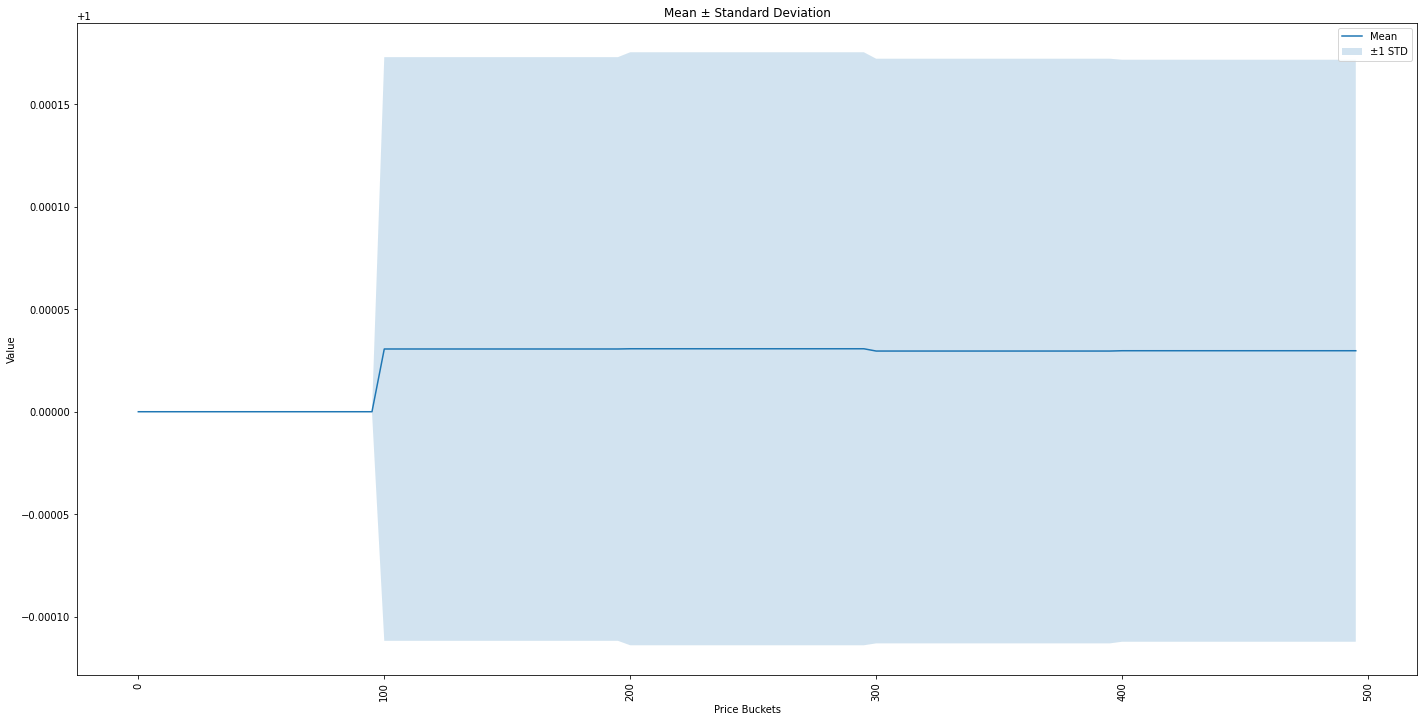

In [41]:
cols = ['mid', 'buy_size', 'buy_price_min', 'buy_price_max', 'sell_size', 'sell_price_min', 'sell_price_max']
ddf1 = df[cols]
shifts = [
    df["mid"].shift(-i) / df["mid"] # shift(-i) means "i rows into the future"
    for i in range(100)
]
df_shifts = pd.concat(shifts, axis=1)
df_shifts.columns = [i*5 for i in range(100)]
df_shifts

SUM_TRADE_SIZE = ddf1['buy_size'].sum() + ddf1['sell_size'].sum()

criterion = ddf1["buy_size"] > SUM_TRADE_SIZE / 10000.0 * 1.0
print("Rows:" , criterion.sum())
# criterion = (ddf1["buy_price_max"] / ddf1["buy_price_min"]) > 1.001

ddf2 = pd.concat([ddf1[criterion], df_shifts[criterion]], axis=1)
stats = ddf2.drop(columns=cols).fillna(method='ffill', axis=1).fillna(1.0).agg(['mean', 'std'])
# stats = ddf2.drop(columns=cols).agg(['mean', 'std'])

# display(df_shifts[criterion])
# display(ddf1[criterion])
# display(ddf2)
display(stats)
# stats.T.plot()

stats_t = stats.T  # Now index is price_*, columns = ['mean','std']

fig, ax = plt.subplots(figsize=(24, 12))

# Plot the mean as a line
ax.plot(stats_t.index, stats_t['mean'], label='Mean')

# Fill between mean - std and mean + std
ax.fill_between(
    stats_t.index,
    stats_t['mean'] - stats_t['std'],
    stats_t['mean'] + stats_t['std'],
    alpha=0.2,
    label='±1 STD'
)

ax.set_title('Mean ± Standard Deviation')
ax.set_xlabel('Price Buckets')
ax.set_ylabel('Value')
ax.legend()
plt.xticks(rotation=90)
plt.show()

In [52]:
df['buy_net'] = df['buy_size'] - df['sell_size']
df['buy_sum'] = df['buy_size'] + df['sell_size']
df['noise'] = np.random.normal(0, 10, len(df['buy_sum']))
df['mid_return_1m'] = np.log(df['mid'].shift(-60) / df['mid'])
df['mid_return_10s'] = np.log(df['mid'].shift(-10) / df['mid'])

display(df)

,mid,bp50,ap50,buy_size,buy_price_min,buy_price_max,sell_size,sell_price_min,sell_price_max,buy_net,buy_sum,noise,mid_return_1m,mid_return_10s
time,,,,,,,,,,,,,,
2025-03-08 00:00:00.025,NaN,NaN,NaN,87.06,15.142,15.145,0.0,NaN,NaN,87.06,87.06,-6.218592,NaN,NaN
2025-03-08 00:00:00.030,NaN,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,-18.132725,NaN,NaN
2025-03-08 00:00:00.035,NaN,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,2.645099,NaN,NaN
2025-03-08 00:00:00.040,NaN,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,9.343939,NaN,NaN
2025-03-08 00:00:00.045,NaN,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,-0.655336,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-09 00:00:01.305,15.1385,15.136,15.139,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,-9.264074,NaN,NaN
2025-03-09 00:00:01.310,15.1385,15.136,15.139,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,21.917106,NaN,NaN
2025-03-09 00:00:01.315,15.1385,15.136,15.139,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,-3.410998,NaN,NaN


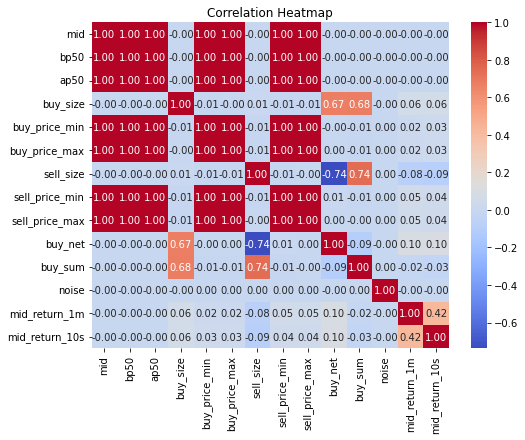

In [53]:
show_heat_map(df)

In [141]:
%reload_ext autoreload
xcols = ['buy_size', 'sell_size', 'ban_buy_net', 'ban_buy_sum', 'noise']
print_mutual_info(df_resampled, xcols, 'ban_mid_return_10s')

       Feature  Mutual Information
0     buy_size            0.041778
1    sell_size            0.047132
2  ban_buy_net            0.030232
3  ban_buy_sum            0.052965
4        noise            0.000000


In [173]:
print(df_resampled.info())
print(np.isinf(df_resampled).sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8641 entries, 2025-03-02 00:00:00 to 2025-03-03 00:00:00
Freq: 10S
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ban_mid             8641 non-null   float64
 1   ban_bp50            8641 non-null   float64
 2   ban_ap50            8641 non-null   float64
 3   buy_size            8639 non-null   float64
 4   sell_size           8640 non-null   float64
 5   ban_mid_return_1m   8635 non-null   float64
 6   ban_mid_return_10s  8640 non-null   float64
 7   ban_buy_net         8639 non-null   float64
 8   ban_buy_sum         8639 non-null   float64
 9   noise               8641 non-null   float64
dtypes: float64(10)
memory usage: 742.6 KB
None
ban_mid               0
ban_bp50              0
ban_ap50              0
buy_size              0
sell_size             0
ban_mid_return_1m     0
ban_mid_return_10s    0
ban_buy_net           0
ban_buy_sum        

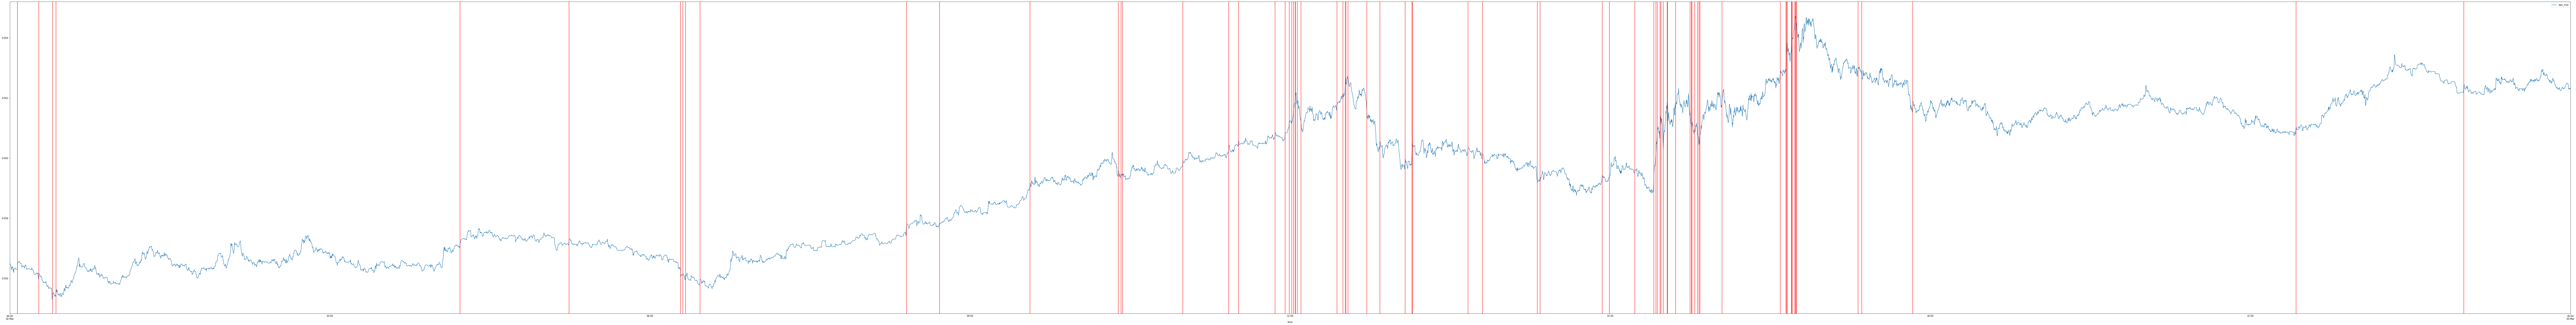

In [125]:
plt.figure(figsize=(200, 25))

df_resampled['ban_mid'].plot(kind='line')
        
for idx in df_resampled[df_resampled['buy_size'] > 200000].index:
    plt.axvline(x=idx, color='red')


plt.legend()
plt.show()

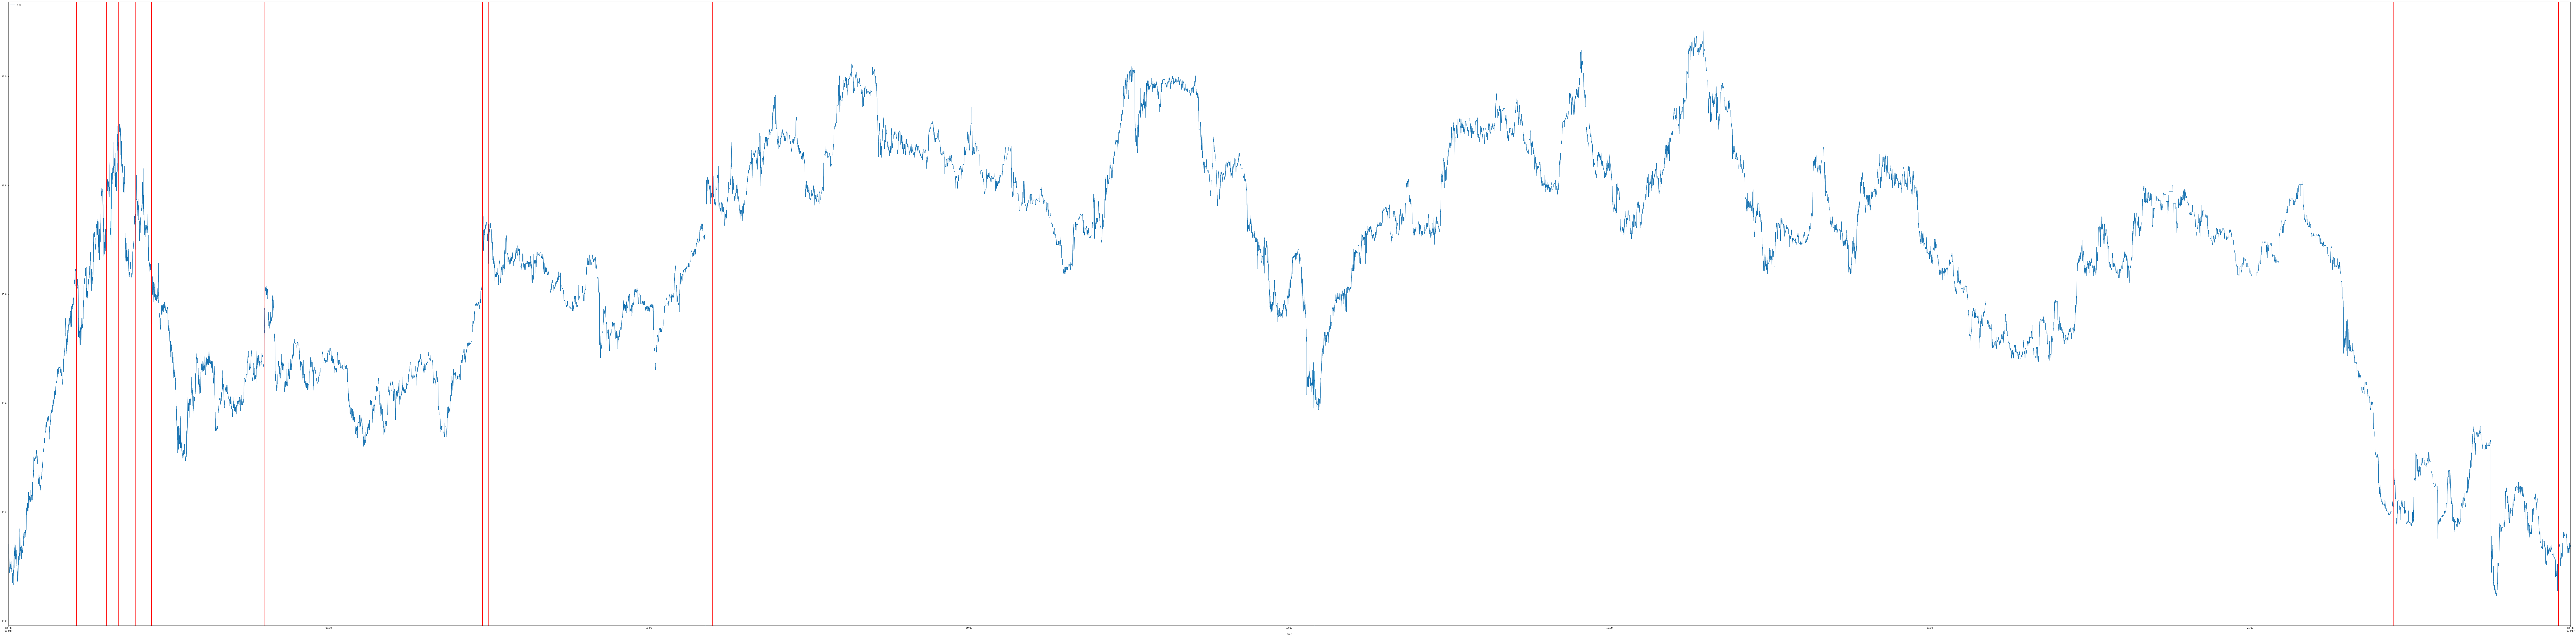

In [171]:
plt.figure(figsize=(200, 50))

df['mid'].plot(kind='line')
        
for idx in df[df['mid_return_10s'] > 0.004].index:
    plt.axvline(x=idx, color='red')

plt.legend()
plt.show()

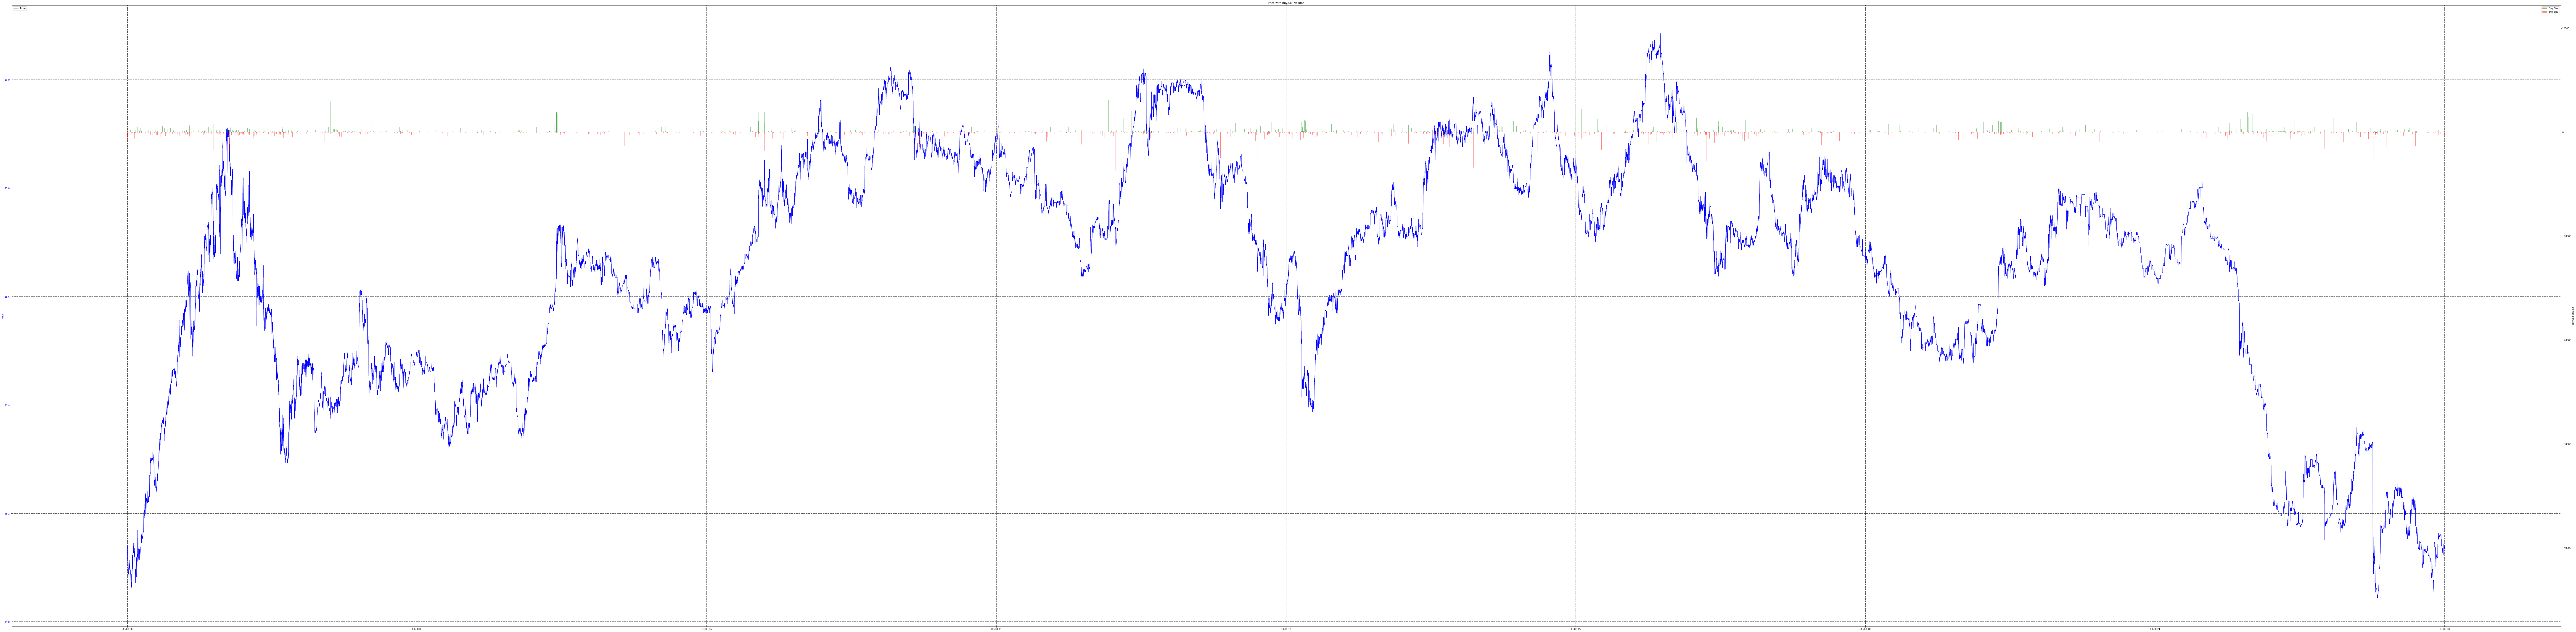

In [209]:
# Create figure and axis
fig, ax1 = plt.subplots(figsize=(200, 50))

df1 = df

# Plot price as a line chart
ax1.plot(df1.index, df1["mid"], color="blue", label="Price")
ax1.set_ylabel("Price", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.grid(True, linestyle="--", linewidth=2.0, alpha=0.7, color='black')  # Add grid lines

# Create a second y-axis for volume bars
ax2 = ax1.twinx()
ax2.bar(df1.index, df1["buy_size"], color="green", alpha=0.5, width=0.00002, label="Buy Size")
ax2.bar(df1.index, -df1["sell_size"], color="red", alpha=0.5, width=0.00002, label="Sell Size")
ax2.set_ylabel("Buy/Sell Volume")
ax2.tick_params(axis="y")

# Show legend
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.title("Price with Buy/Sell Volume")
plt.show()

<BarContainer object of 500 artists>

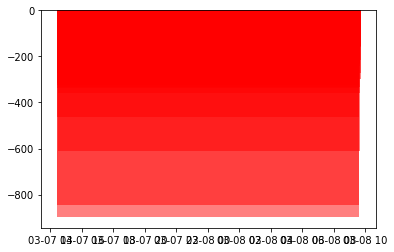

In [184]:

plt.bar(df1.index, -df1["sell_size"], color="red", alpha=0.5, label="Sell Size")

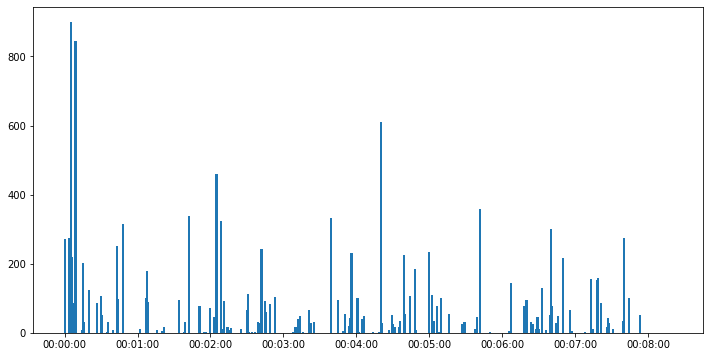

In [200]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(df1.index , df1['sell_size'], width=0.00002)
ax1.xaxis.set_major_locator(mdates.AutoDateLocator())  # Auto adjust tick spacing
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M:%S"))  # Format as time

In [195]:
df1.index

DatetimeIndex(['2025-03-08 00:00:00', '2025-03-08 00:00:01',
               '2025-03-08 00:00:02', '2025-03-08 00:00:03',
               '2025-03-08 00:00:04', '2025-03-08 00:00:05',
               '2025-03-08 00:00:06', '2025-03-08 00:00:07',
               '2025-03-08 00:00:08', '2025-03-08 00:00:09',
               ...
               '2025-03-08 00:08:10', '2025-03-08 00:08:11',
               '2025-03-08 00:08:12', '2025-03-08 00:08:13',
               '2025-03-08 00:08:14', '2025-03-08 00:08:15',
               '2025-03-08 00:08:16', '2025-03-08 00:08:17',
               '2025-03-08 00:08:18', '2025-03-08 00:08:19'],
              dtype='datetime64[ns]', name='time', length=500, freq='S')